# **Analysis of Amazon Sales to Understand Business Performance using Historical Data and Propose Business Solutions for Future Sales using Machine Learning**

Disclaimer: (1) This data analysis and coding are prepared with the aid of Google Colab, ChatGPT, and Google Gemini. (2) I am a student learning 'analysis' with the aid of Python and AI tools (not necessarily hardcore coding skills per se).

Given the Amazon sales data 2025, our objective are as follows:

1. Identify patterns and relationships between/among variables
2. Discover business insights
3. Using logistic regression, identify biggest influencers of Sales
4. Propose businesssolution

Step 1: Upload the file

In [81]:
import pandas as pd

df=pd.read_csv('/kaggle/input/amazon-sales-2025/amazon_sales_data 2025.csv')

# Display first few rows
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


**Step 2. Exploratory Data Analysis**

**a. Check information (i.e., completeness, types)**

In [82]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


None

**b. Check if there are missing values**

In [83]:
missing = df.isnull().sum()

if missing.sum() == 0:
    print("✅ No missing values in the DataFrame.")
else:
    print("⚠️ Missing values detected:\n")
    print(missing[missing > 0])

✅ No missing values in the DataFrame.


**c. High-level check of relationships of variables (e.g., price, quantity, and sales)**

Generating pairwise plot...


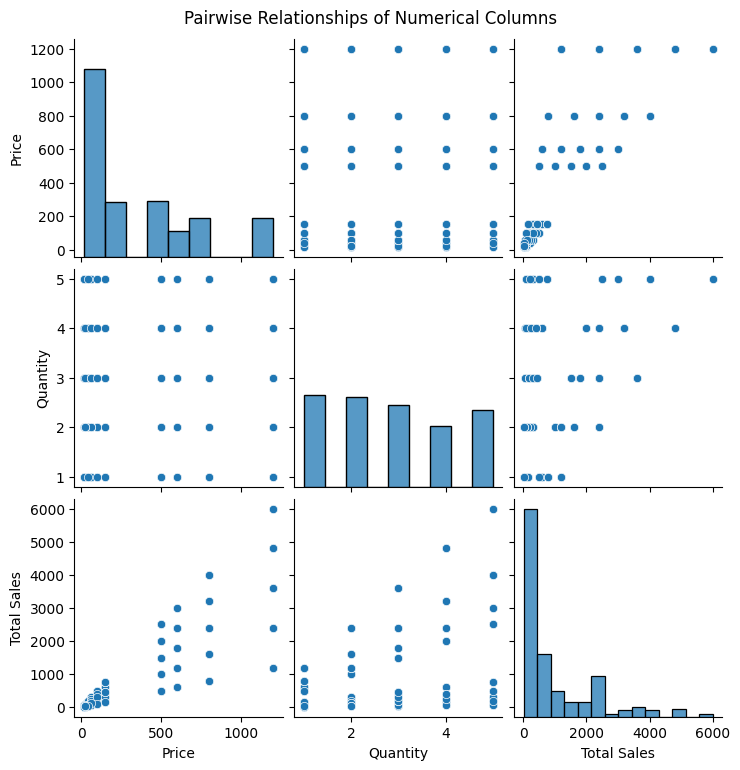


Generating heatmap of correlation matrix...


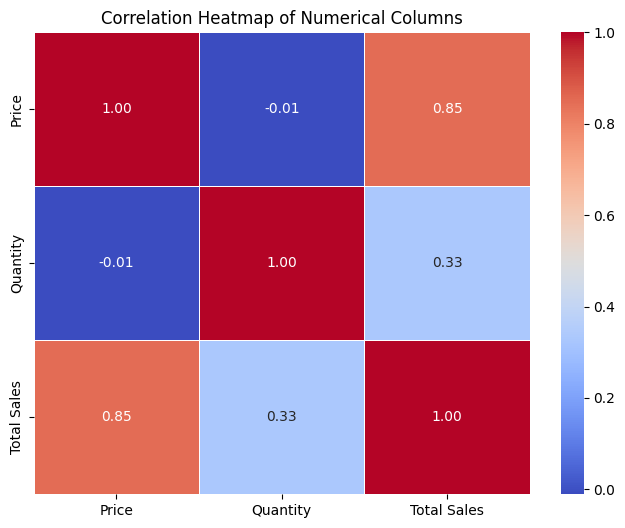

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for pairwise plot and heatmap
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# (a) Create a pairwise plot of numerical columns
if len(numerical_cols) > 1:
    print("Generating pairwise plot...")
    sns.pairplot(df[numerical_cols])
    plt.suptitle('Pairwise Relationships of Numerical Columns', y=1.02) # Add a title
    plt.show()
else:
    print("Not enough numerical columns to create a pairwise plot.")

# (b) Create a heatmap of the correlation matrix of numerical columns
if len(numerical_cols) > 0:
    print("\nGenerating heatmap of correlation matrix...")
    plt.figure(figsize=(8, 6)) # Adjust figure size as needed
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap of Numerical Columns')
    plt.show()
else:
    print("No numerical columns to create a heatmap.")

**Interpretation:**

* The products are generally clustered at the low-priced range (USD0-200) representing around 70% of the total volume, with quantity or frequency dropping as price increases. This may indicate that the products in Amazon are inexpensive or budget items.
* The right tale of the histogram shows beyond USD600, indicating smaller subset of premium or high-end products.

**Business implication:**
* The product listing appears to be dominated by low-cost goods.
* Marketing or pricing strategies could focus on ths low-cost segment since it drives the volume. *italicized text*

**d. Identify the allocation or distribution per category (e.g., product, category, payment type, location).**

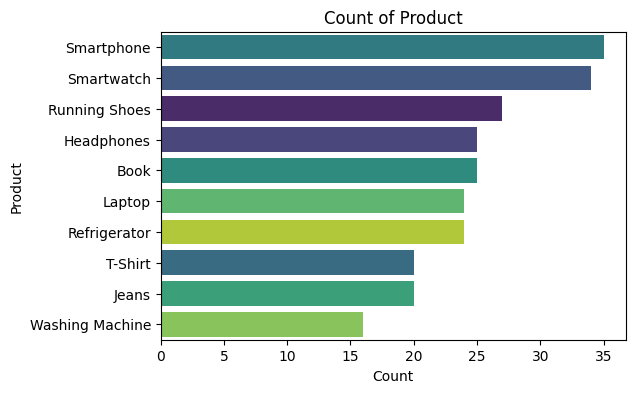

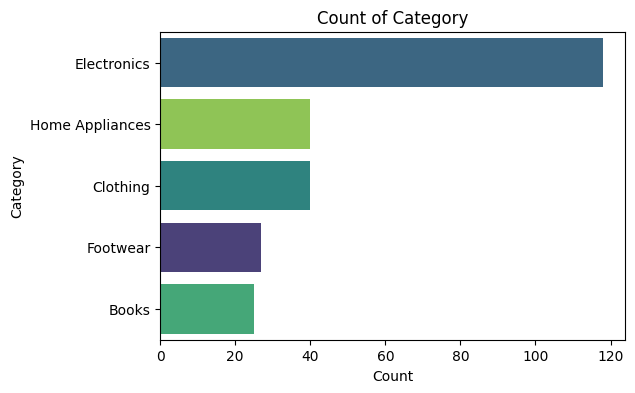

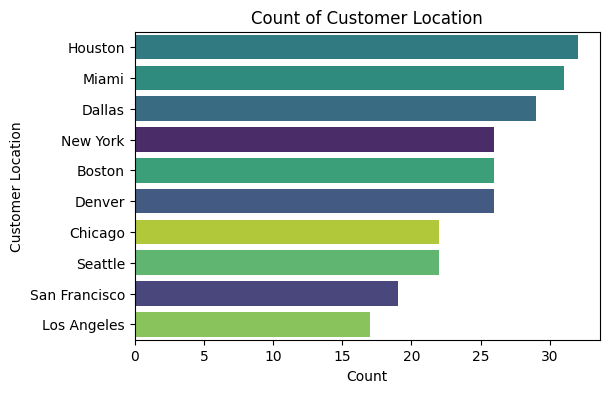

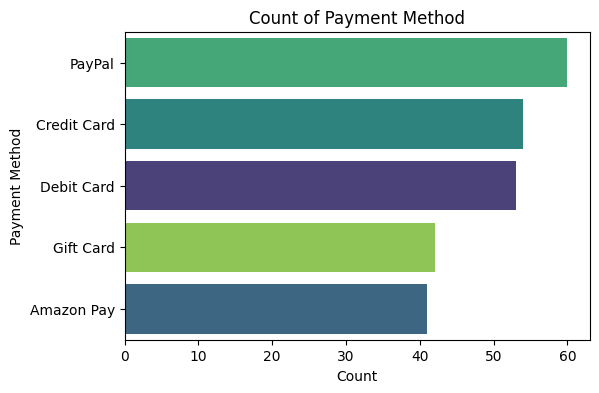

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to create countplots for
columns_to_plot = ['Product', 'Category', 'Customer Location', 'Payment Method']

# Create countplots for each specified column
for col in columns_to_plot:
    plt.figure(figsize=(6, 4)) # Adjust figure size as needed
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis', hue=col, legend=False) # Addressed FutureWarning
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

**Interpretation:**

a. Count of Product:
* Sales volume mix appear to be dominated by smartphones (top 1), smartwatch (top 2), and running shoes (top 3).
* Sales volume is least driven by washing machine.

Business insights:
* Focus marketing and inventory efforts on Smartphones and Smartwatches — the top performers.
* For mid-tier items (Running Shoes, Headphones, etc.), consider promotional bundles or seasonal campaigns to push volumes higher.
* Investigate low-performing products (Washing Machines, Jeans) — check pricing, visibility, or stock availability issues.

b. Count of category:
* Electronics overwhelmingly lead the sales in terms of volume. If looked together with Products, this confirms the initial observation that smartphones, smarwatch, laptops are the main sales volume driver which is most likely the core of the business.  
* Footwear and books being the least. Maybe further analyzed as this could be a result of low product exposure or pricing strategies.  

Business insights:
* The business may focus on electronics as regards inventory and marketing strategies, delivering strongest performance.
* Combine bundling and use machine learning to cross-sell electronic gadgets (e.g., smartphones and headphones, laptops and accessories)
* Expand campaigns for clothing and appliances to increase their share of business
* Review footwear and books if contributing to the business (may need to discontinue) or reposition them (i.e., promotions, discounts).


c. Count of location:
* Houston (top 1), Miami (top 2) and Dallas (top 3) taking the lead in generating sales volume for Amazon. This maybe the key regional markets.
* Los Angeles, San Francisco, and Seatle/Chicago lagging at the bottom 3, indicating smaller customer base or less sales focus.

Business insights:
* Prioritize marketing and fulfillment efforts in the key region areas. Demand is strongest here.
* Investigate what drives sales in these areas, and may be replicated in mid and low sales volume region.
* For low sales volume region, analyze further any barriers such as shipping costs, product availability, or local competition.

d. Count of Payment Method:
* Customers appear to favor Paypal over all payment modes, followed by credit card. This may mean that the customers demonstrate trust in security and convenience, making it a key payment channel.
* Amazon pay and gift card being the least favored method. These may be used only due to promotions, not as everyday payment options.

Business Insights:
* Ensure smooth check-out experience for Paypal and card payments.
* Consider exclusive discounts or cashback offers for Paypal or card users to encourage repeat customers.


**e.  Identify the relationship of each category to sales**

**e.i Relationship of product type and Sales**

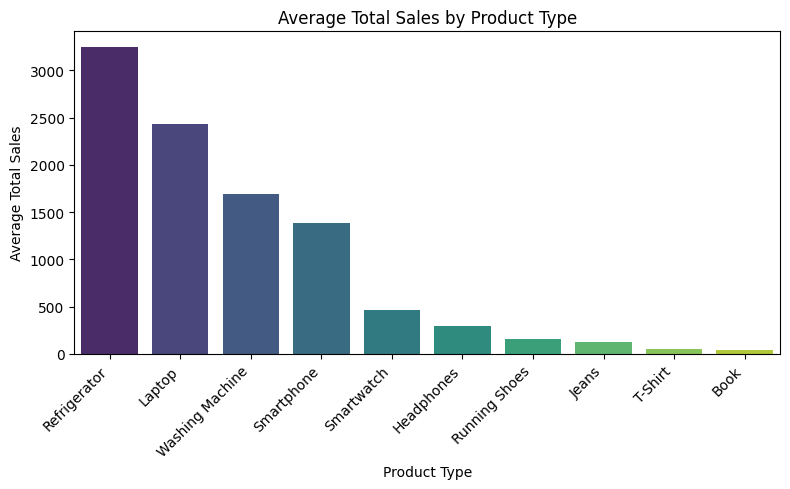

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average Total Sales for each Product
average_sales_by_product = df.groupby('Product')['Total Sales'].mean().sort_values(ascending=False)

# Create a bar plot of average Total Sales by Product
plt.figure(figsize=(8, 5)) # Adjust figure size as needed
sns.barplot(x=average_sales_by_product.index, y=average_sales_by_product.values, palette='viridis', hue=average_sales_by_product.index, legend=False) # Addressed FutureWarning
plt.title('Average Total Sales by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Total Sales')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

**Interpretation:**
* Refrigarator earns the highest in terms of sales value (in USD) followed by laptops and washing mashine. This could be because these are high-priced products or bigh-ticket items, driving revenue even with small volume.
* Smartphones and smartwatches follow next, showing mid-range sales. These are volume drivers which are sold more frequently but at lower price-points.
* Headphones, running shoes, jeans, t-shirts, and books show low average total sales. These could be low value or impluse purchases.

**Business insights:**
* Prioritize high-value items as these drive revenue. May use premium marketing strategies or extended warranty offers to drive volume.
* As recommended earlier, possible bundling and promotions for mid-tier products to increase average order value (AOV).


**e.ii Relationship of Payment Method and Sales**

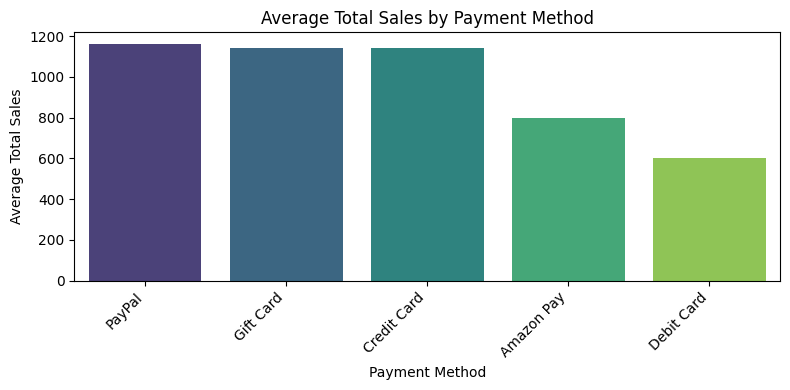

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average Total Sales for each Payment Method
average_sales_by_payment = df.groupby('Payment Method')['Total Sales'].mean().sort_values(ascending=False)

# Create a bar plot of average Total Sales by Payment Method
plt.figure(figsize=(8, 4)) # Adjust figure size as needed
sns.barplot(x=average_sales_by_payment.index, y=average_sales_by_payment.values, palette='viridis', hue=average_sales_by_payment.index, legend=False) # Addressed FutureWarning
plt.title('Average Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Total Sales')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

**Interpretation:**
* PayPal, Gift Card, and Credit Card transactions have the highest average total sales, all hovering around the same level (~USD1,100–USD1,200). This suggests that customers using these payment methods tend to make larger purchases or buy higher-value items.
* Amazon Pay ranks mid-range, with slightly lower average sales (~USD800). Customers using Amazon Pay might prefer smaller or mid-priced items, or it may be more popular for quick convenience purchases.
* Debit Card shows the lowest average total sales (~USD600). This could indicate that debit card users are more price-conscious, making smaller purchases or sticking to essential items.


**Business insights:**
* Encourage PayPal and Credit Card transactions through cashback or reward programs. These methods correlate with higher spending behavior.
* Promote Gift Cards during holidays and campaigns, as they are linked with high-value orders and preloaded spending
* Optimize Amazon Pay promotions to increase adoption and transaction size (e.g., discounts for using Amazon Pay)
* Target debit card users with low-cost bundles or value deals to increase basket size.

**e.iii Relationship of Customer Location and Sales**

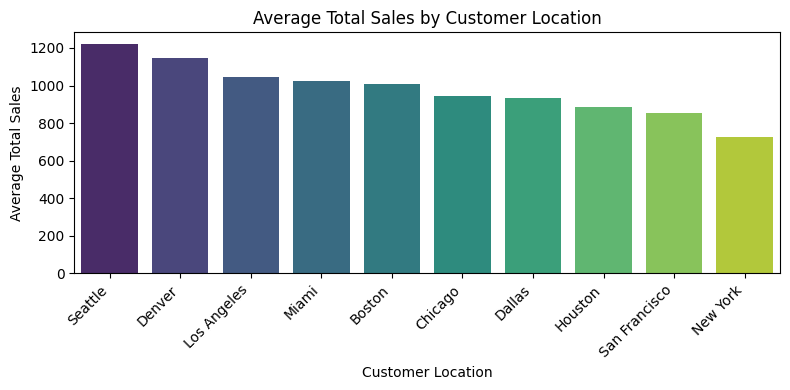

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average Total Sales for each Customer Location
average_sales_by_location = df.groupby('Customer Location')['Total Sales'].mean().sort_values(ascending=False)

# Create a bar plot of average Total Sales by Customer Location
plt.figure(figsize=(8, 4)) # Adjust figure size as needed
sns.barplot(x=average_sales_by_location.index, y=average_sales_by_location.values, palette='viridis', hue=average_sales_by_location.index, legend=False)
plt.title('Average Total Sales by Customer Location')
plt.xlabel('Customer Location')
plt.ylabel('Average Total Sales')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Interpretation:

* Seattle leads with the highest average total sales (~$1,200). Seattle customers appear to spend more per transaction. May be higher disposable income (validate).
* Denver and Los Angeles follow closely.  
* Miami, Boston, Chicago are mid-range representing moderate purchase behaviour.
* Dallas, Houston, San Francisco and New York show lower ranges. This could be due to many reasons like regional preferences, cost of living and stronger channel competition.

Business insights:

* Top markets (Seattle, Denver, LA) - ideal for premium product promotions and exclusive deals
* Mid-tier markets (Miami, Boston Chicago) - targeted ads or loyalty incentives
* Lower-tier markets (Dallas, Houston, San Francisco, NY) - maybe competitive pricing, shipping discounts (or free), or personalized recommendation (analyze using ML).




e.iv. Relatioship of Product Category and Sales

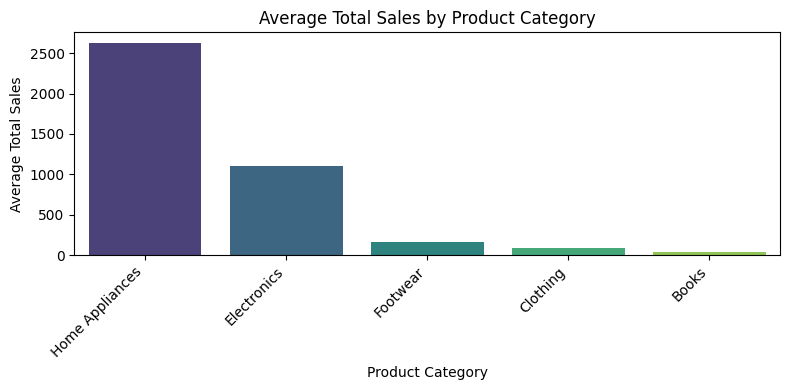

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average Total Sales for each Category
average_sales_by_category = df.groupby('Category')['Total Sales'].mean().sort_values(ascending=False)

# Create a bar plot of average Total Sales by Category
plt.figure(figsize=(8, 4)) # Adjust figure size as needed
sns.barplot(x=average_sales_by_category.index, y=average_sales_by_category.values, palette='viridis', hue=average_sales_by_category.index, legend=False) # Addressed FutureWarning
plt.title('Average Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Total Sales')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Interpretation:

* Home Appliances lead significantly with an average total sales of around (USD2,000). This is far higher than all other categories. This suggests that customers are spending the most on high-ticket items such as refrigerators, washing machines, or similar appliances.
* Electronics come in second with an average around (USD1,100). This likely includes products like laptops, smartphones, or smartwatches. These are still high-value purchases, but less expensive compared to home appliances.
* Footwear, Clothing, and Books show much lower average total sales (below USD200 each). These represent low-ticket categories with smaller per-transaction values or more price-sensitive consumer behavior.

Business insights:

* Revenue concentration: The majority of revenue comes from high-value categories (Home Appliances and Electronics). This is even though they may have fewer transactions, each sale contributes significantly to total revenue.
* Opportunity in lower categories: Footwear, Clothing, and Books could be areas for growth through volume-based strategies such as:
    * Bundling or multi-buy promotions
    * Seasonal discounts or limited editions
    * Subscription or loyalty programs to drive repeat purchases

* Strategic focus: Continue reinforcing premium positioning and after-sales support in Home Appliances and Electronics, while building cross-selling opportunities (e.g., offering accessories or warranties).


**f. Identify the influencers driving sales and predict the sales using machine learning**

**f.1 Create a new Sales Category to identify drivers per quartile**

Disclaimer: Here I utilize built-in Google Gemini by instructing to perform my idea of (a) finding the variables influencing the sales (as independent variable) using logistic regression; and (b) making recommendations.

You may expect below the codes and task being explained.

In [90]:
import pandas as pd

# Define sales categories based on quartiles
df['Sales Category'] = pd.qcut(df['Total Sales'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

print("New 'Sales Category' column added:")
display(df[['Total Sales', 'Sales Category']].head())
display(df['Sales Category'].value_counts())

New 'Sales Category' column added:


,Total Sales,Sales Category
0,180,Medium-Low
1,400,Medium-Low
2,120,Medium-Low
3,180,Medium-Low
4,450,Medium-High


,count
Sales Category,
Medium-Low,65
Low,64
Medium-High,61
High,60


# Task
Perform logistic regression to understand which variables influence 'Total Sales' by first transforming 'Total Sales' into a categorical variable using quartiles and then using 'Sales Category' as the target variable.

## Data preparation

### Subtask:
Select the features (independent variables) and the target variable ('Sales Category'). Handle categorical features by encoding them (e.g., one-hot encoding).


**Reasoning**:
Select features, define the target variable, and apply one-hot encoding to categorical features.



In [91]:
# Define feature columns (excluding the target, Order ID which is an identifier, and Date for now)
feature_cols = ['Product', 'Category', 'Price', 'Quantity', 'Customer Name', 'Customer Location', 'Payment Method', 'Status']

# Define the target variable
y = df['Sales Category']

# Identify categorical feature columns
categorical_cols = df[feature_cols].select_dtypes(include='object').columns

# Apply one-hot encoding to categorical features
X_categorical = pd.get_dummies(df[categorical_cols], columns=categorical_cols, drop_first=True)

# Identify numerical feature columns
numerical_cols = df[feature_cols].select_dtypes(include=['int64', 'float64']).columns

# Select numerical features
X_numerical = df[numerical_cols]

# Concatenate numerical and one-hot encoded categorical features
X = pd.concat([X_numerical, X_categorical], axis=1)

print("Features (X) and Target (y) defined.")
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)
display(X.head())
display(y.head())

Features (X) and Target (y) defined.
Shape of features (X): (250, 39)
Shape of target (y): (250,)


,Price,Quantity,Product_Headphones,Product_Jeans,Product_Laptop,Product_Refrigerator,Product_Running Shoes,Product_Smartphone,Product_Smartwatch,Product_T-Shirt,...,Customer Location_Miami,Customer Location_New York,Customer Location_San Francisco,Customer Location_Seattle,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_Gift Card,Payment Method_PayPal,Status_Completed,Status_Pending
0,60,3,False,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
1,100,4,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,60,2,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,60,3,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,150,3,False,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,True


,Sales Category
0,Medium-Low
1,Medium-Low
2,Medium-Low
3,Medium-Low
4,Medium-High


## Data splitting

### Subtask:
Split the data into training and testing sets to evaluate the model's performance on unseen data.


**Reasoning**:
Split the data into training and testing sets using the train_test_split function.



In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data split into training and testing sets.
Shape of X_train: (200, 39)
Shape of X_test: (50, 39)
Shape of y_train: (200,)
Shape of y_test: (50,)


## Model training

### Subtask:
Train a multinomial logistic regression model using the training data.


**Reasoning**:
Train a multinomial logistic regression model using the training data.



In [93]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the logistic regression model to the training data
model.fit(X_train, y_train)

print("Multinomial Logistic Regression model trained successfully.")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Multinomial Logistic Regression model trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Reasoning**:
The model failed to converge, so I need to increase the max_iter parameter to allow more iterations for the solver to find the optimal solution.



In [94]:
# Instantiate a LogisticRegression model with increased max_iter
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)

# Fit the logistic regression model to the training data
model.fit(X_train, y_train)

print("Multinomial Logistic Regression model trained successfully with increased iterations.")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Multinomial Logistic Regression model trained successfully with increased iterations.


**Reasoning**:
The model still failed to converge after increasing max_iter. Scaling the data is another common approach to address convergence issues in logistic regression.



In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Apply scaler only to numerical columns
numerical_cols_train = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train_scaled[numerical_cols_train] = scaler.fit_transform(X_train[numerical_cols_train])
X_test_scaled[numerical_cols_train] = scaler.transform(X_test[numerical_cols_train])


# Instantiate and fit the logistic regression model with scaled data and increased max_iter
model = LogisticRegression(solver='lbfgs', max_iter=50000) # Removed multi_class='multinomial'
model.fit(X_train_scaled, y_train)

print("Multinomial Logistic Regression model trained successfully with scaled data and increased iterations.")

Multinomial Logistic Regression model trained successfully with scaled data and increased iterations.


## Model evaluation

### Subtask:
Evaluate the trained model's performance using appropriate metrics (e.g., accuracy, classification report) on the testing data.


**Reasoning**:
Evaluate the trained model's performance using appropriate metrics on the testing data.



In [96]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the scaled testing data
y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9000

Classification Report:
              precision    recall  f1-score   support

        High       0.88      1.00      0.93         7
         Low       1.00      0.88      0.93        16
 Medium-High       0.86      0.86      0.86        14
  Medium-Low       0.86      0.92      0.89        13

    accuracy                           0.90        50
   macro avg       0.90      0.91      0.90        50
weighted avg       0.91      0.90      0.90        50



## Interpret results

### Subtask:
Analyze the model's coefficients or feature importance to understand which variables influence the 'Sales Category'.


**Reasoning**:
Access and display the model coefficients and intercept to understand feature influence.



In [97]:
import pandas as pd

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Get the feature names
feature_names = X_train_scaled.columns

# Create a DataFrame to display coefficients for each class
# The classes are ordered alphabetically by default in LogisticRegression
classes = model.classes_
coef_df = pd.DataFrame(coefficients.T, index=feature_names, columns=[f'Coef_{c}' for c in classes])

# Add the intercept to the DataFrame (optional, but good for completeness)
intercept_df = pd.DataFrame([intercept], columns=[f'Intercept_{c}' for c in classes], index=['Intercept'])
coef_df = pd.concat([coef_df, intercept_df])

print("Model Coefficients and Intercepts:")
display(coef_df)

Model Coefficients and Intercepts:


,Coef_High,Coef_Low,Coef_Medium-High,Coef_Medium-Low,Intercept_High,Intercept_Low,Intercept_Medium-High,Intercept_Medium-Low
Price,3.086373,-2.469799,0.851274,-1.467848,NaN,NaN,NaN,NaN
Quantity,2.294029,-1.686646,0.066310,-0.673693,NaN,NaN,NaN,NaN
Product_Headphones,-0.521907,-0.304592,-0.199385,1.025884,NaN,NaN,NaN,NaN
Product_Jeans,-0.228011,-0.463094,-0.376031,1.067135,NaN,NaN,NaN,NaN
Product_Laptop,0.912205,-0.099019,-0.486043,-0.327143,NaN,NaN,NaN,NaN
Product_Refrigerator,-0.069961,-0.008595,0.089576,-0.011019,NaN,NaN,NaN,NaN
Product_Running Shoes,-0.217550,-0.539152,-0.345896,1.102598,NaN,NaN,NaN,NaN
Product_Smartphone,0.847598,-0.672144,0.557781,-0.733234,NaN,NaN,NaN,NaN
Product_Smartwatch,-0.818624,-1.013377,1.202318,0.629683,NaN,NaN,NaN,NaN
Product_T-Shirt,-0.065234,0.771301,-0.131226,-0.574841,NaN,NaN,NaN,NaN


**Reasoning**:
Analyze the displayed coefficients to identify the most influential features for each sales category.



In [98]:
# Analyze the magnitude and sign of the coefficients
# We can look at the absolute values of the coefficients to see which features have the largest impact on the log-odds for each class.

print("\nAnalysis of Coefficients:")

# For 'High' sales category
print("\nFeatures influencing 'High' sales category (largest positive coefficients):")
display(coef_df['Coef_High'].sort_values(ascending=False).head())
print("\nFeatures influencing 'High' sales category (largest negative coefficients):")
display(coef_df['Coef_High'].sort_values(ascending=True).head())

# For 'Low' sales category
print("\nFeatures influencing 'Low' sales category (largest positive coefficients):")
display(coef_df['Coef_Low'].sort_values(ascending=False).head())
print("\nFeatures influencing 'Low' sales category (largest negative coefficients):")
display(coef_df['Coef_Low'].sort_values(ascending=True).head())

# For 'Medium-High' sales category
print("\nFeatures influencing 'Medium-High' sales category (largest positive coefficients):")
display(coef_df['Coef_Medium-High'].sort_values(ascending=False).head())
print("\nFeatures influencing 'Medium-High' sales category (largest negative coefficients):")
display(coef_df['Coef_Medium-High'].sort_values(ascending=True).head())

# For 'Medium-Low' sales category
print("\nFeatures influencing 'Medium-Low' sales category (largest positive coefficients):")
display(coef_df['Coef_Medium-Low'].sort_values(ascending=False).head())
print("\nFeatures influencing 'Medium-Low' sales category (largest negative coefficients):")
display(coef_df['Coef_Medium-Low'].sort_values(ascending=True).head())

print("\nGeneral Observations:")
print("- Features with larger absolute coefficient values have a stronger influence on the log-odds of a particular sales category.")
print("- A positive coefficient indicates that as the feature value increases, the log-odds of being in that category (relative to the reference class) increase.")
print("- A negative coefficient indicates that as the feature value increases, the log-odds of being in that category (relative to the reference class) decrease.")

# Note: The interpretation of coefficients in multinomial logistic regression is relative to a reference class.
# By default, scikit-learn uses the last class as the reference class. In this case, the reference class is 'Medium-Low' (alphabetically last).
print("\nInterpretation Note:")
print("The coefficients are interpreted relative to the 'Medium-Low' sales category (the reference class).")
print("For example, a positive coefficient for 'Price' in the 'High' column means that a higher price increases the log-odds of being in the 'High' category compared to the 'Medium-Low' category.")


Analysis of Coefficients:

Features influencing 'High' sales category (largest positive coefficients):


,Coef_High
Price,3.086373
Quantity,2.294029
Product_Laptop,0.912205
Product_Smartphone,0.847598
Product_Washing Machine,0.535609



Features influencing 'High' sales category (largest negative coefficients):


,Coef_High
Product_Smartwatch,-0.818624
Product_Headphones,-0.521907
Customer Location_Los Angeles,-0.315358
Category_Clothing,-0.293244
Customer Location_Dallas,-0.280467



Features influencing 'Low' sales category (largest positive coefficients):


,Coef_Low
Product_T-Shirt,0.771301
Customer Name_Jane Smith,0.448029
Customer Location_Los Angeles,0.431329
Customer Location_Chicago,0.423184
Customer Name_Sophia Miller,0.343678



Features influencing 'Low' sales category (largest negative coefficients):


,Coef_Low
Price,-2.469799
Category_Electronics,-2.089132
Quantity,-1.686646
Product_Smartwatch,-1.013377
Product_Smartphone,-0.672144



Features influencing 'Medium-High' sales category (largest positive coefficients):


,Coef_Medium-High
Product_Smartwatch,1.202318
Category_Electronics,1.074671
Price,0.851274
Product_Smartphone,0.557781
Customer Name_Sophia Miller,0.457380



Features influencing 'Medium-High' sales category (largest negative coefficients):


,Coef_Medium-High
Payment Method_Gift Card,-0.526739
Category_Clothing,-0.507256
Product_Laptop,-0.486043
Customer Name_Michael Brown,-0.434760
Product_Jeans,-0.376031



Features influencing 'Medium-Low' sales category (largest positive coefficients):


,Coef_Medium-Low
Product_Running Shoes,1.102598
Category_Footwear,1.102598
Product_Jeans,1.067135
Product_Headphones,1.025884
Customer Location_Dallas,0.667442



Features influencing 'Medium-Low' sales category (largest negative coefficients):


,Coef_Medium-Low
Price,-1.467848
Product_Smartphone,-0.733234
Customer Name_Sophia Miller,-0.709272
Quantity,-0.673693
Product_T-Shirt,-0.574841



General Observations:
- Features with larger absolute coefficient values have a stronger influence on the log-odds of a particular sales category.
- A positive coefficient indicates that as the feature value increases, the log-odds of being in that category (relative to the reference class) increase.
- A negative coefficient indicates that as the feature value increases, the log-odds of being in that category (relative to the reference class) decrease.

Interpretation Note:
The coefficients are interpreted relative to the 'Medium-Low' sales category (the reference class).
For example, a positive coefficient for 'Price' in the 'High' column means that a higher price increases the log-odds of being in the 'High' category compared to the 'Medium-Low' category.


**Reasoning**:
Based on the coefficient analysis, summarize the key findings about which variables are most influential for each sales category.



In [99]:
# Summarize the findings based on the coefficient analysis

print("\nSummary of Influential Features for Each Sales Category (Relative to 'Medium-Low'):")

print("\n'High' Sales Category:")
print("- Highly influenced by Price and Quantity (positive coefficients).")
print("- Products like Laptop, Smartphone, and Washing Machine positively influence the log-odds of being in this category.")
print("- Products like Smartwatch and Headphones negatively influence the log-odds.")
print("- Customer Location seems to have a smaller influence compared to Price, Quantity, and Product type.")

print("\n'Low' Sales Category:")
print("- Strongly negatively influenced by Price, Category_Electronics, and Quantity.")
print("- Positively influenced by products like T-Shirt.")
print("- Some Customer Locations (e.g., Chicago, Los Angeles) and Payment Methods (e.g., PayPal) show positive influence, though generally less strong than Price/Quantity/Product.")

print("\n'Medium-High' Sales Category:")
print("- Positively influenced by products like Smartwatch and Category_Electronics.")
print("- Also positively influenced by Price and Smartphone.")
print("- Negatively influenced by Payment Methods like Gift Card, and products like Laptop and clothing related categories/products.")

print("\n'Medium-Low' Sales Category:")
print("- Since this is the reference category, the coefficients show features that increase the log-odds of being in other categories relative to 'Medium-Low'.")
print("- Features with negative coefficients in other categories are relatively more influential in this category (e.g., lower Price, Quantity, Product_Smartphone, Product_T-Shirt, Customer Name_Sophia Miller).")
print("- Features with large positive coefficients in this column increase the log-odds of being in 'Medium-Low' relative to some other category, but this interpretation is less direct. It's often easier to interpret the coefficients for the non-reference classes.")
print("- Looking at the positive coefficients here, Product_Running Shoes, Category_Footwear, Product_Headphones, and Product_Jeans show positive influence, suggesting these are more likely associated with the 'Medium-Low' category compared to some other categories.")

print("\nOverall Influential Features:")
print("- Price and Quantity appear to be the most consistently influential numerical features across categories.")
print("- Specific Product types and Categories have significant influence, shifting the probability towards certain sales categories.")
print("- Customer Location and Payment Method have some influence, but generally less pronounced than Price, Quantity, Product, and Category.")
print("- Status (Completed/Pending) seems to have minimal influence based on the small coefficient values.")


Summary of Influential Features for Each Sales Category (Relative to 'Medium-Low'):

'High' Sales Category:
- Highly influenced by Price and Quantity (positive coefficients).
- Products like Laptop, Smartphone, and Washing Machine positively influence the log-odds of being in this category.
- Products like Smartwatch and Headphones negatively influence the log-odds.
- Customer Location seems to have a smaller influence compared to Price, Quantity, and Product type.

'Low' Sales Category:
- Strongly negatively influenced by Price, Category_Electronics, and Quantity.
- Positively influenced by products like T-Shirt.
- Some Customer Locations (e.g., Chicago, Los Angeles) and Payment Methods (e.g., PayPal) show positive influence, though generally less strong than Price/Quantity/Product.

'Medium-High' Sales Category:
- Positively influenced by products like Smartwatch and Category_Electronics.
- Also positively influenced by Price and Smartphone.
- Negatively influenced by Payment Method

## Summary:

### Data Analysis Key Findings

*   The logistic regression model achieved an accuracy of 0.9000 on the testing data, with F1-scores ranging from 0.85 to 0.93 across different sales categories.
*   Price and Quantity are the most consistently influential numerical features across all sales categories.
*   Specific Product types and Categories significantly influence the likelihood of a transaction falling into a particular sales category. For example, Laptop, Smartphone, and Washing Machine are positively associated with the 'High' sales category, while T-Shirt is positively associated with the 'Low' category.
*   Customer Location and Payment Method have some influence on sales category prediction, but their impact is generally less significant than Price, Quantity, Product, and Category.
*   The transaction Status (Completed/Pending) appears to have minimal influence on the sales category based on the small coefficient values.

### Insights or Next Steps

*   Focus marketing and sales efforts on high-value products (e.g., Laptops, Smartphones) and consider strategies to increase the quantity of items purchased to drive higher sales categories.
*   Investigate the relationship between specific customer locations and payment methods with sales categories further to potentially tailor regional or payment-specific promotions.
